# Tâche 7

### Ce notebook permet de  déterminer la bande interdite du NaInS2 puis de trouve la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion 

### Ensuite, on calcule la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique

### Dans un cristal, les électrons ne se comportent pas comme dans un atome isolé.Leurs niveaux d’énergie se répartissent en bandes d’énergie continues séparées par des bandes interdites (gaps)

### La relation de dispersion décrit comment l’énergie E d’un électron varie en fonction de son vecteur d’onde k

In [11]:
from pymatgen.ext.matproj import MPRester  
from pymatgen.io.cif import CifWriter  
from IPython.display import FileLink  
from pymatgen.electronic_structure.plotter import BSPlotter  
import numpy as np  
import matplotlib.pyplot as plt  

# On définit la clé d'API pour accéder à la base de données
key = "kHK7l7itQo2c5bLbQQIsHOTh5cQ7HUnw"  
material = "mp-20289"   # variables pour l'identifiant du matériau (NaInS2)
m = MPRester(key)

# On récupère la structure du matériau en cellule unitaire conventionnelle
struct = m.get_structure_by_material_id(material, conventional_unit_cell=True)

# On affiche un lien pour télécharger la structure
w = CifWriter(struct)
w.write_file(material+".cif") 
print("Cliquez sur le lien suivant pour télécharger le fichier CIF du matériau") 
display(FileLink(material+".cif")) 

# On récupère la structure de bande du matériau 
band = m.get_bandstructure_by_material_id(material)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Cliquez sur le lien suivant pour télécharger le fichier CIF du matériau


/home/users/r/p/rperger/mp-20289.cif

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Gap énergétique

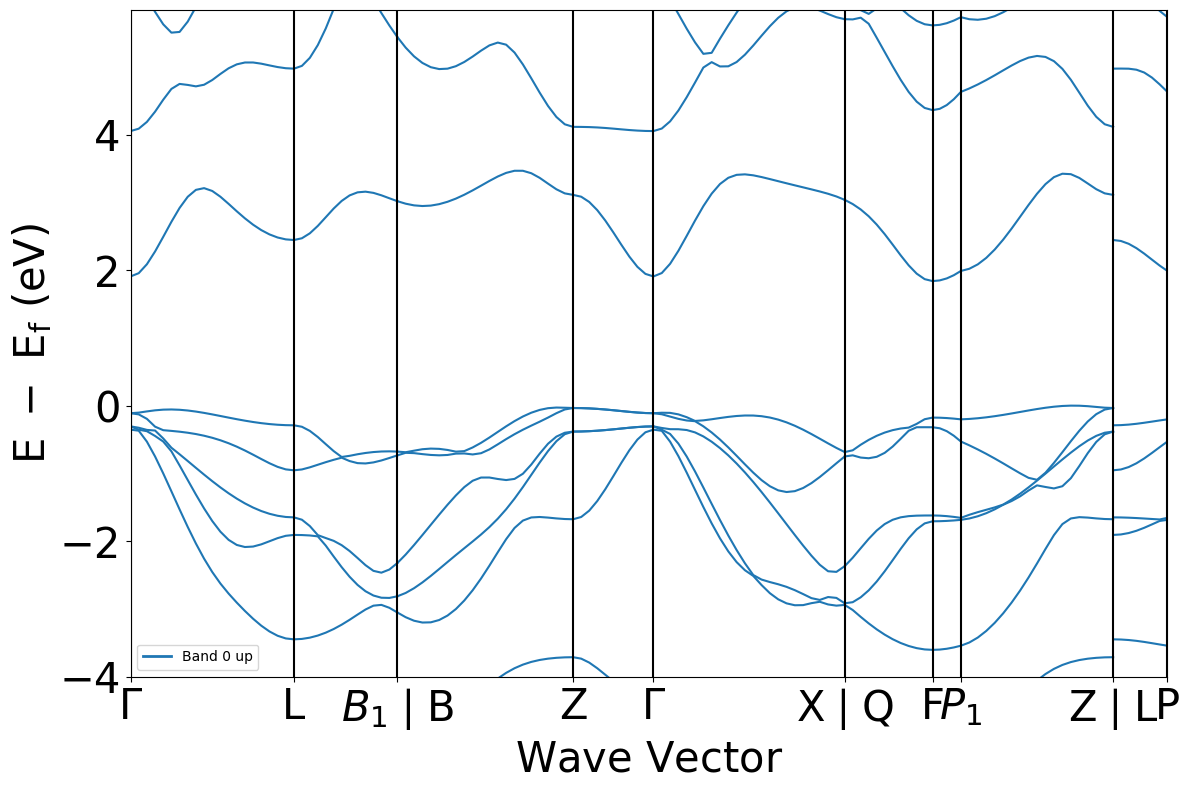

Le gap énergétique (écart entre conduction et valence) est de : {'direct': False, 'energy': 1.8377, 'transition': '(0.544,0.544,0.413)-F'}


In [12]:
# On crée un objet BSPlotter pour voire la structure de bandes
bsplotter = BSPlotter(band)
bsplotter.show() 

# On affiche l'écart d'énergie entre la conduction et la valence
print("Le gap énergétique (écart entre conduction et valence) est de :", band.get_band_gap()) 

#### On a ici un gap indirect, ce qui signifie que le maximum de la bande de valence et le minimum de la bande de conduction ne se trouvent pas au même point du vecteur d’onde k. La transition électronique associée au gap s’effectue entre le point (0.544, 0.544, 0.413) et le point F.

## Extrémas de la dispersion aux extrémités des bandes de valence et de conduction

### détermination de la dernière bande de valence et de la première bande de conduction

In [13]:
cbm = band.get_cbm()
print(cbm['band_index'])
vbm = band.get_vbm()
print(vbm['band_index'])


defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})


### détermination des directions des extrémas

La plus forte dispersion dans la bande de valence se traduit par une pente de 0.9908459039859259 dans la direction Q-F
Cette valeur est représentée par la flèche rouge sur le graphique.
La dispersion la plus faible dans la bande de valence est de 0.1579052377977601 dans la direction Z- Γ 
elle est représentée par la flèche bleue sur le diagramme.
 
Dans la bande de conduction, la plus forte dispersion correspond à une pente de 2.5668384697967612 dans les directions Z-Γ et P1-Z
Ces valeurs sont représentées par les flèches vertes sur le graphique.
La plus faible dispersion dans la bande de conduction est de 0.09020088301014628 dans la direction F-P1
elle est représentée par la flèche jaune sur le diagramme.
 
Voici le graphique représentant la structure des bandes électroniques du matériau :


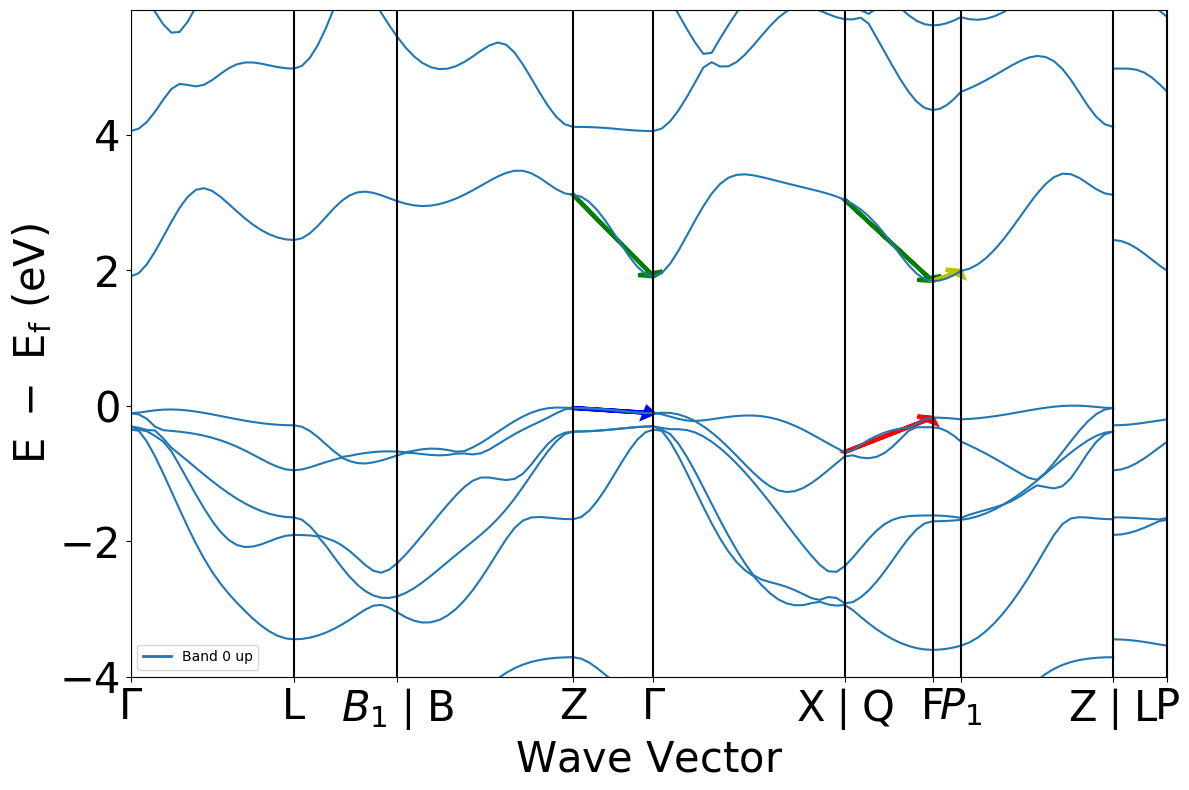

In [14]:
# On récupère les données de la structure de bandes
data = bsplotter.bs_plot_data()
pl = bsplotter.get_plot()
E = data.get('energy').get('1')  # Énergies des bandes
D = data.get('ticks').get('distance')  # Distances entre les points dans l'espace k

# On définit les indices des bandes de valence et de conduction
Vindex = 15
Cindex = 16

# On initialise des tableaux pour stocker les pentes de la dispersion des bandes
slopeV = np.zeros(9)  # Pentes pour la bande de valence
slopeC = np.zeros(9)  # Pentes pour la bande de conduction
Dbranch = np.unique(D)   # On élimine les redondances dans les distances

# On calcule les pentes des branches des bandes de valence et de conduction
for i in range(len(Dbranch)-1):
    DeltaD = Dbranch[i+1]-Dbranch[i]  # Différence de distance entre deux points
    slopeV[i] = abs(((E[i][Vindex])[-1] - (E[i][Vindex])[0])/(DeltaD))  # Pente de la bande de valence
    slopeC[i] = abs(((E[i][Cindex])[-1] - (E[i][Cindex])[0])/(DeltaD))  # Pente de la bande de conduction

# On détermine les pentes maximales et minimales pour chaque bande
maxV = np.max(slopeV)  # Pente maximale de la bande de valence
minV = np.min(slopeV)  # Pente minimale de la bande de valence
print("La plus forte dispersion dans la bande de valence se traduit par une pente de", maxV, "dans la direction Q-F")
print("Cette valeur est représentée par la flèche rouge sur le graphique.")
print("La dispersion la plus faible dans la bande de valence est de", minV, "dans la direction Z- Γ ")
print("elle est représentée par la flèche bleue sur le diagramme.")
print(" ")

maxC = np.amax(slopeC)  # Pente maximale de la bande de conduction
minC = np.amin(slopeC)  # Pente minimale de la bande de conduction
print("Dans la bande de conduction, la plus forte dispersion correspond à une pente de", maxC, "dans les directions Z-Γ et P1-Z")
print("Ces valeurs sont représentées par les flèches vertes sur le graphique.")
print("La plus faible dispersion dans la bande de conduction est de", minC, "dans la direction F-P1")
print("elle est représentée par la flèche jaune sur le diagramme.")
print(" ")

# On affiche les flèches représentant les dispersions maximales et minimales
plt.arrow(Dbranch[5], (E[5][Vindex])[0], Dbranch[6] - Dbranch[5], (E[5][Vindex])[-1] - (E[5][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(Dbranch[3], (E[3][Vindex])[0], Dbranch[4] - Dbranch[3], (E[3][Vindex])[-1] - (E[3][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
plt.arrow(Dbranch[3], (E[3][Cindex])[0], Dbranch[4] - Dbranch[3], (E[3][Cindex])[-1] - (E[3][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.arrow(Dbranch[5], (E[5][Cindex])[0], Dbranch[6] - Dbranch[5], (E[5][Cindex])[-1] - (E[5][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.arrow(Dbranch[6], (E[6][Cindex])[0], Dbranch[7] - Dbranch[6], (E[6][Cindex])[-1] - (E[6][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)

print("Voici le graphique représentant la structure des bandes électroniques du matériau :")
plt.show()


## Calcul de la masse effective

### Hypothèse : Dispersion parabolique
on suppose que la relation entre l'énergie et le vecteur d'onde est parabolique

### Formule de la masse effective :
La masse effective peut être approximée par la formule suivante :

$$
m^* = \frac{h^2 k^2}{2 E(k)}
$$

où :
- \( h \) est la constante de Planck,
- \( k \) est le vecteur d'onde,
- \( E(k)  est l'énergie de l'électron en fonction du vecteur d'onde k \).

In [15]:

# Constante de Planck réduite en eV·s
h_bar = 6.5821e-16  

# Énergie du sommet de la bande de valence en valeure absolue
E_vbm = abs(band.get_vbm()['energy'])  
k_coord_val = band.get_vbm()['kpoint'].frac_coords  
k2_val = k_coord_val[0]**2 + k_coord_val[1]**2 + k_coord_val[2]**2
m_vbm = (h_bar**2 * k2_val) / (2 * E_vbm)
print(f"Masse effective au sommet de la dernière bande de valence : {m_vbm:.4e} kg")

# Énergie du bas de la bande de conduction en valeure absolue
E_cbm = abs(band.get_cbm()['energy'])  # en eV
k_coord_cond = band.get_cbm()['kpoint'].frac_coords
k2_cond = k_coord_cond[0]**2 + k_coord_cond[1]**2 + k_coord_cond[2]**2
m_cbm = (h_bar**2 * k2_cond) / (2 * E_cbm)
print(f"Masse effective au bas de la première bande de conduction : {m_cbm:.4e} kg")


Masse effective au sommet de la dernière bande de valence : 4.6094e-32 kg
Masse effective au bas de la première bande de conduction : 1.9997e-32 kg
